## Michaela Allen $-$ PHYS 513: Homework 4

1. Newman 7.1: Fourier transforms of simple functions $-$ Write Python programs to calculate the coefficients in the discrete Fourier transforms of the following periodic functions sampled at $N = 1000$ evenly spaced points, and make plots of their amplitudes similar to the plot shown in Fig. 7.4: <br>
<br>
$\quad \quad a)$ A single cycle of a square-wave with amplitude 1 <br>
$\quad \quad b)$ The sawtooth wave $y_{n} = n$ <br>
$\quad \quad c)$ The modulated sine wave $y_{n} = sin(\frac{πn}{N}) sin(\frac{20πn}{N})$ <br>
<br>
If you wish you can use the Fourier transform function from the file $\verb|dft.py|$ as a starting point for your program.

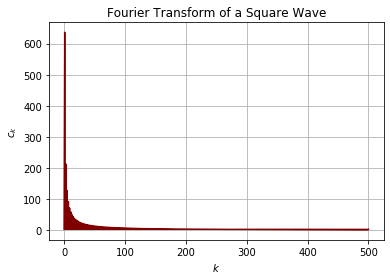

In [112]:
# 1: Newman 7.1 --- a)

# necessary imports:

import numpy as np
from cmath import exp
from scipy import signal
from dft import dft
import matplotlib.pyplot as plt 

# define constants and our square wave (using scipy.signal to make square wave):

N = 1000

def square_wave(n):
    return signal.square(2 * np.pi * n)

vals = [] # empty set to append our square wave values to 

for i in np.linspace(0, 1, N):
    
    sw = square_wave(i)
    
    vals.append(sw)

# then use dft.py from textbook:

c = dft(vals)

# and plot:

plt.plot(abs(c), color='maroon')
plt.title("Fourier Transform of a Square Wave")
plt.xlabel('$k$')
plt.ylabel('$c_{k}$')
plt.grid()
plt.show()

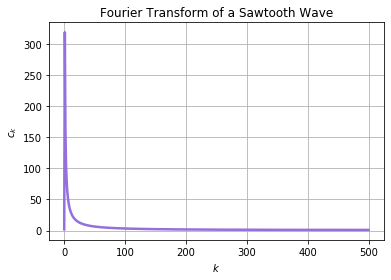

In [113]:
# 1: Newman 7.1 --- b)
# sawtooth wave

def sawtooth_wave(n):
    return signal.sawtooth(2 * np.pi * n)

vals = [] # empty set to append our sawtooth wave values to 

for i in np.linspace(0, 1, N):
    
    sw2 = sawtooth_wave(i)
    
    vals.append(sw2)

# then use dft.py from textbook:

c = dft(vals)

# and plot:

plt.plot(abs(c), '-', color='mediumpurple', linewidth=2.5)
plt.title("Fourier Transform of a Sawtooth Wave")
plt.xlabel('$k$')
plt.ylabel('$c_{k}$')
plt.grid()
plt.show()

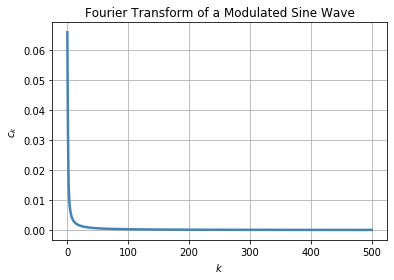

In [114]:
# 1: Newman 7.1 --- c)
# modulated sine wave

def sine_wave(n):
    return np.sin((np.pi * n) / N) * np.sin((20 * np.pi * n) / N)

vals = [] # empty set to append our sine wave values to 

for i in np.linspace(0, 1, N):
    
    sw3 = sine_wave(i)
    
    vals.append(sw3)

# then use dft.py from textbook:

c = dft(vals)

# and plot:

plt.plot(abs(c), '-', color='steelblue', linewidth=2.5)
plt.title("Fourier Transform of a Modulated Sine Wave")
plt.xlabel('$k$')
plt.ylabel('$c_{k}$')
plt.grid()
plt.show()

---

2. Newman 7.3: Fourier transforms of musical instruments $-$ In the on-line resources you will find files called $\verb|piano.txt|$ and $\verb|trumpet.txt|$, which contain data representing the wave form of a single note, played on, respectively, a piano and a trumpet. <br>
<br>
$a)$ Write a program that loads a waveform from one of these files, plots it, then calculates its discrete Fourier transform and plots the magnitudes of the first 10 000 coefficients in a manner similar to Fig. 7.4. Note that you will have to use a fast Fourier transform for the calculation because there are too many samples in the files to do the transforms the slow way in any reasonable amount of time. <br>
<br>
Apply your program to the piano and trumpet waveforms and discuss briefly what one can conclude about the sound of the piano and trumpet from the plots of Fourier coefficients. <br>
<br>
$b)$ Both waveforms were recorded at the industry-standard rate of 44 100 samples per second and both instruments were playing the same musical note when the recordings were made. From your Fourier transform results calculate what note they were playing. (Hint: The musical note middle C has a frequency of 261Hz.)


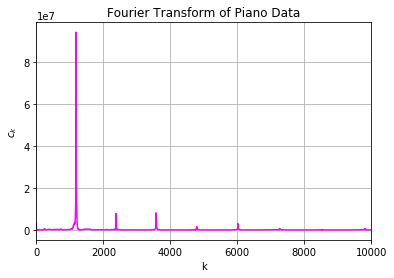

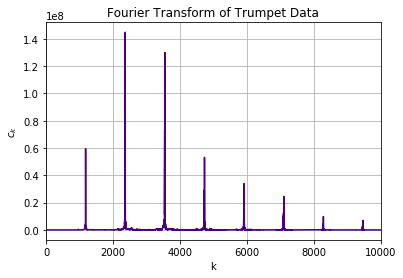

In [115]:
# 2: Newman 7.3 --- a)

# necessary imports:

import numpy as np
from numpy.fft import rfft, irfft
import matplotlib.pyplot as plt

# load the data:

piano_data = np.loadtxt('piano.txt')
trumpet_data = np.loadtxt('trumpet.txt')

# calculating the fourier transforms using rfft:

pc = abs(rfft(piano_data))
tc = abs(rfft(trumpet_data))

# and plotting:

plt.figure(1)
plt.plot(pc, '-', color='magenta')
plt.xlim(0, 10000)
plt.title('Fourier Transform of Piano Data')
plt.xlabel('k')
plt.ylabel('$c_{k}$')
plt.grid()

plt.figure(2)
plt.plot(tc, '-', color='indigo')
plt.xlim(0, 10000)
plt.title('Fourier Transform of Trumpet Data')
plt.xlabel('k')
plt.ylabel('$c_{k}$')
plt.grid()

plt.show()

$a) - continued \quad$ From these fourier transforms, we can conclude that the sounds (actually the tones) from a piano and trumpet are going to be vastly different$-$ which we definitely know to be true.

In [116]:
# 2: Newman 7.3 --- b)

# we want to find the k for the first peak of each plot-- after several adjustments to xlim to better see the peak,
# the peak is at k = 1190.

k_peak = 1190

# then to find the note they are playing, multiply that k_peak by the samples per second over the total number
# of samples:

note = k_peak * 44100 / 100000

print("The note they are playing is at", note, '[Hz], which is roughly 2 times the middle C frequency, 261 [Hz]. \n')
print('It is most likely the high C note, C5.')

The note they are playing is at 524.79 [Hz], which is roughly 2 times the middle C frequency, 261 [Hz]. 

It is most likely the high C note, C5.


---

3. Newman 7.4: Fourier filtering and smoothing $-$ In the on-line resources you’ll find a file called $\verb|dow.txt|$. It contains the daily closing value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, which is a measure of average prices on the US stock market. <br>
Write a program to do the following: <br>
<br>
$ \quad \quad a)$ Read in the data from $\verb|dow.txt|$ and plot them on a graph. <br>
$ \quad \quad b)$ Calculate the coefficients of the discrete Fourier transform of the data using the function
$\verb|rfft|$ from $\verb|numpy.fft|$, which produces an array of $\quad \quad \quad \frac{1}{2}N + 1$ complex numbers. <br>
$ \quad \quad c)$ Now set all but the first 10% of the elements of this array to zero (i.e., set the last 90% to
zero but keep the values of the first 10%). <br>
$ \quad \quad d)$ Calculate the inverse Fourier transform of the resulting array, zeros and all, using the function $\verb|irfft|$, and plot it on the same graph as the $\quad \quad \quad$original data. You may need to vary the colors of the two curves to make sure they both show up on the graph. Comment on what you see. What $\quad \quad \quad$is happening when you set the Fourier coefficients to zero? <br>
$ \quad \quad e)$ Modify your program so that it sets all but the first 2% of the coefficients to zero and run
it again.

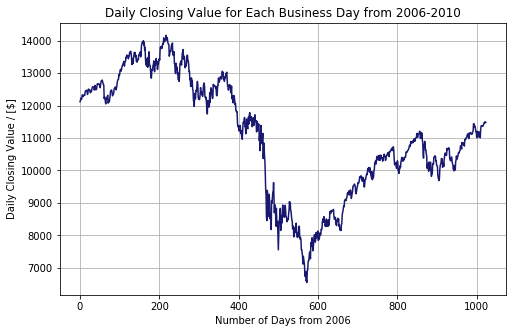

In [117]:
# 3: Newman 7.4 --- a)

# necessary imports:

import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft, irfft

# read in data and plot:

data = np.loadtxt('dow.txt')

fig = plt.figure(figsize=[8, 5])
plt.plot(data, '-', color='midnightblue')
plt.title('Daily Closing Value for Each Business Day from 2006-2010')
plt.xlabel('Number of Days from 2006')
plt.ylabel('Daily Closing Value / [$]')
plt.grid()
plt.show()

In [118]:
# 3: Newman 7.4 --- b) 
# calculate coefficients using rfft

c = rfft(data)

In [119]:
# 3: Newman 7.4 --- c)
# set all but first 10% of the elements of this array to zero

first_10 = int(0.1 * len(c)) # this is the first ten percent of points of c

for i in range(first_10, len(c), 1): # actually setting that last 90% to zero
    c[i] = 0

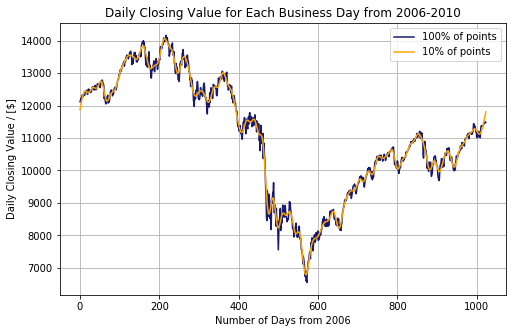

In [120]:
# 3: Newman 7.4 --- d)
# now calculate inverse transform of above matrix and plot:

ic = irfft(c)

fig = plt.figure(figsize=[8, 5])
plt.plot(data, '-', color='midnightblue', linewidth=1.5, label='100% of points')
plt.plot(ic, '-', color='orange', label='10% of points')
plt.title('Daily Closing Value for Each Business Day from 2006-2010')
plt.xlabel('Number of Days from 2006')
plt.ylabel('Daily Closing Value / [$]')
plt.legend()
plt.grid()
plt.show()

$d) - continued \quad$ When we set those coefficients to zero, the line looks less noisy-- i.e. getting rid of noise and smoothing the line.

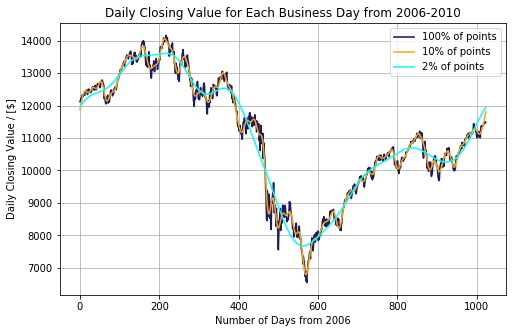

In [121]:
# 3: Newman 7.4 --- e)
c2 = rfft(data)

first_2 = int(0.02 * len(c2)) # this is the first 2% of points

for i in range(first_2, len(c2), 1): # setting 98% of points to zero
    c2[i] = 0
    
ic2 = irfft(c2) # calculate inverse transform

# plot the data again:

fig = plt.figure(figsize=[8, 5])
plt.plot(data, '-', color='midnightblue', linewidth=1.6, label='100% of points')
plt.plot(ic, '-', color='orange', label='10% of points')
plt.plot(ic2, '-', color='cyan', label='2% of points')
plt.title('Daily Closing Value for Each Business Day from 2006-2010')
plt.xlabel('Number of Days from 2006')
plt.ylabel('Daily Closing Value / [$]')
plt.legend()
plt.grid()
plt.show()

---

4. Newman 7.8: Diffraction gratings $-$ Write a Python program that uses a fast Fourier transform to calculate the diffraction pattern for a grating with transmission function $q(u) = sin^{2}αu$ (the same as in Exercise 5.19), with
slits of width 20 μm [meaning that α = π/(20 μm)] and parameters as above: w = 200 μm, W = 10w = 2mm, incident light of wavelength λ = 500 nm, a lens with focal length of 1meter,
and a screen 10 cm wide. Choose a suitable number of points to give a good approximation
to the grating transmission function and then make a graph of the diffraction intensity on the
screen as a function of position x in the range −5 cm ≤ x ≤ 5 cm. If you previously did
Exercise 5.19, check to make sure your answers to the two exercises agree.

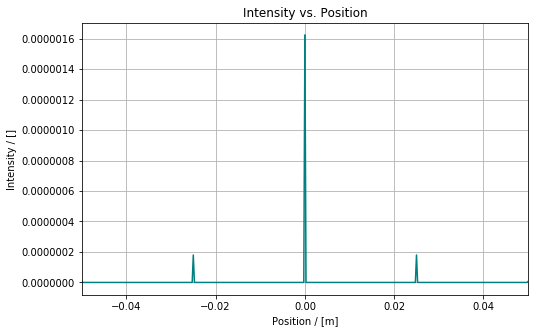

In [122]:
# 4: Newman 7.8 --- diffraction gratings

# necessary imports:

import numpy as np
from numpy.fft import rfft, irfft
import matplotlib.pyplot as plt

# define constants:

slit_width = 20e-6 # [m]
alpha = np.pi / slit_width
w = 200e-6 # [m] width of grating
W = 2e-3 # [m] # 10 times w
lambda1 = 500e-9 # [m]
focal_length = 1 # [m]
screen_width = 10e-2 # [m]
spacing = (lambda1 * focal_length) / W
N = 100000
n = np.arange(0, N)

# define y_n function -- just the square root of the transmission function:

def y(u):
    return np.sqrt(np.sin(alpha * u)**2)

# set u-- pg. 321, u = nw/N - w/2 (but use W) and get our y_n points:

u_n = (n*W/N) - W/2


y_points = np.array(list(map(y, u_n)), float)

# do transform of the y_points:

ft_y = rfft(y_points)

# now put the coefficients from above into the intensity eq:

I_xk = (W**2 / N**2) * abs(ft_y)**2


# now we need our xk points so we can plot intensity as a function of position:

k = np.arange(0, len(I_xk), 1)

x_points = ((lambda1*focal_length)/W) * k # pg. 322

# now plot:

fig = plt.figure(figsize=[8, 5])
plt.plot(-x_points, I_xk, '-', color='teal')
plt.plot(x_points, I_xk, '-', color='teal')
plt.xlim(-5e-2, 5e-2)
plt.title('Intensity vs. Position')
plt.xlabel('Position / [m]')
plt.ylabel('Intensity / []')
plt.grid()
plt.show()

---

5. Newman 7.9: Image deconvolution <br>
$a)$ Write a program that reads the grid of values into a two-dimensional array of real numbers and then draws the values on the screen of the computer as a density plot. You should see the photo appear. If you get something wrong it might be upside-down. Work with the details of your program until you get it appearing correctly. (Hint: The picture has the sky, which is bright, at the top and the ground, which is dark, at the bottom.)<br>
<br>
$b)$ Write another program that creates an array, of the same size as the photo, containing a grid of samples drawn from the Gaussian f (x, y) above with σ = 25. Make a density plot of these values on the screen too, so that you get a visualization of your point spread function. Remember that the point spread function is periodic (along both axes), which means that the values for negative x and y are repeated at the end of the interval. <br>
<br>
$c)$ Combine your two programs and add Fourier transforms using the functions $\verb|rfft2|$ and $\verb|irfft2|$ from $\verb|numpy.fft|$, to make a program that does the following: <br>
<br>
$\quad \quad$ i) Reads in the blurred photo <br>
$\quad \quad$ ii) Calculates the point spread function <br>
$\quad \quad$ iii) Fourier transforms both <br>
$\quad \quad$ iv) Divides one by the other <br>
$\quad \quad$ v) Performs an inverse transform to get the unblurred photo <br>
$\quad \quad$ vi) Displays the unblurred photo on the screen <br>
<br>
When you are done, you should be able to make out the scene in the photo, although probably it will still not be perfectly sharp.
Hint: One thing you’ll need to deal with is what happens when the Fourier transform of the point spread function is zero, or close to zero. In that case if you divide by it you’ll get an error (because you can’t divide by zero) or just a very large number (because you’re dividing by something small). A workable compromise is that if a value in the Fourier transform of the point spread function is smaller than a certain amount $\epsilon$ you don’t divide by it—just leave that coefficient alone. The value of $\epsilon$ is not very critical but a reasonable value seems to be 10−3. <br>
<br>
$d)$ Bearing in mind this last point about zeros in the Fourier transform, what is it that limits our ability to deblur a photo? Why can we not perfectly unblur any photo and make it completely sharp?

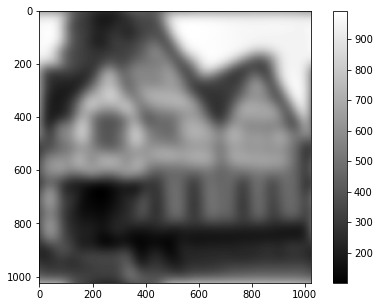

In [123]:
# 5: Newman 7.9 --- a)

# necessary imports:

import numpy as np
from numpy.fft import rfft2, irfft2
import matplotlib.pyplot as plt
from cmath import exp

# load the data:

data = np.loadtxt('blur.txt')


# I am using imshow here to plot the data as a density plot-- imshow does exactly what the question is asking for

fig = plt.figure(figsize=[8, 5])
plt.imshow(data) 
plt.colorbar()
plt.gray()

size of image is 1024 X 1024


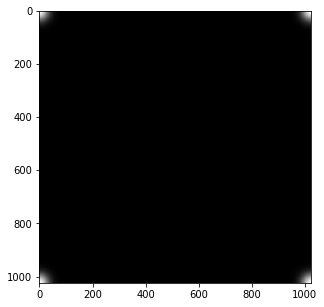

In [124]:
# 5: Newman 7.9 --- b)

# from cmath import exp ### definitely do NOT use cmath exp, it will not work. not sure why though

# define constants:

sigma = 25

x, y = data.shape
print("size of image is", x, 'X', y)

grid_sample_array = np.zeros([x, y]) # make an array the same size as the data

# define point spread function:

def f(x,y):
    c1 = np.exp(- (x**2 + y**2) / (2*sigma**2))               # c=corner, so 4 c equations for each corner
    c2 = np.exp(- ((x-1024)**2 + y**2) / (2*sigma**2))        # then just add them together for entire function
    c3 = np.exp(- (x**2 + (y-1024)**2) / (2*sigma**2))
    c4 = np.exp(- ((x-1024)**2 + (y-1024)**2) / (2*sigma**2))
    return c1 + c2 + c3 + c4


# now actually filling the array:

for i in range(0, x, 1):
    for j in range(0, y, 1):
        grid_sample_array[i, j] = f(i, j)

# plotting again with imshow:

fig = plt.figure(figsize=[8, 5])            
plt.imshow(grid_sample_array)
plt.gray()

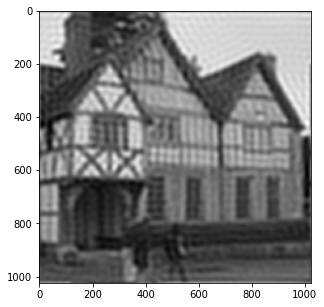

In [125]:
# 5: Newman 7.9 --- c)
# i and ii above:

# iii: fourier transform blurred photo and the grid_sample_array:

ft_b = rfft2(data) # fourier transform blurred
ft_gsa = rfft2(grid_sample_array) # fourier transform grid sample array

# iv: divides one by the other:

epsilon = 1e-3 # given in book --- after playing around with different values, i think you can even go down to 1e-4
#              # or even 1e-5. 


div = np.zeros([x, y // 2 + 1], complex)

for i in range(x):
    for j in range(y // 2 + 1):
        
        if ft_gsa[i,j] < epsilon:
            div[i,j] = ft_b[i,j]
        
        else:
            div[i,j] = ft_b[i,j] / ft_gsa[i,j]
            
            
# v: perform inverse transform:

ift_div = irfft2(div)

# plot:

fig = plt.figure(figsize=[8, 5]) 
plt.imshow(ift_div)

$d)$ I guess what limits our ability is the point spread function. And maybe, more specifically, the fourier transform of it? There will always come a point where we will get to such small values that we have to leave the coefficients alone. 